In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\med7k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('NikeProductDescriptions.csv')  # Place ton fichier dans le même dossier que ton notebook
print(df.head())
print(df.columns)

                          Title     Subtitle  \
0          Nike Air Force 1 '07  Men's Shoes   
1          Nike Air Max Dawn SE  Men's Shoes   
2  Nike SB Dunk Low Pro Premium  Skate Shoes   
3   Nike Air Force 1 Mid '07 LX  Men's Shoes   
4      Nike Air Force 1 Mid '07  Men's Shoes   

                                 Product Description  
0  It doesn't get more legendary than this. Desig...  
1  Find out what moves you with the Air Max Dawn....  
2  Pack your style—on your feet. Bringing a fresh...  
3  The celebrations just keep coming. Unbox the A...  
4  Got your fave colour yet? No worries, the Colo...  
Index(['Title', 'Subtitle', 'Product Description'], dtype='object')


In [3]:
valid_subtitles = [
    "Men's Shoes", "Men's T-Shirt", "Women's Shoes",
    "Skate Shoes", "Older Kids' T-Shirt"
]

df['Subtitle'] = df['Subtitle'].fillna("")
df['Subtitle'] = df['Subtitle'].apply(lambda x: 'Shorts' if 'Shorts' in x else x)
df_filtered = df[df['Subtitle'].isin(valid_subtitles + ['Shorts'])].copy()

print(df_filtered['Subtitle'].value_counts()

SyntaxError: incomplete input (1308105483.py, line 10)

In [4]:
valid_subtitles = [
    "Men's Shoes", "Men's T-Shirt", "Women's Shoes",
    "Skate Shoes", "Older Kids' T-Shirt"
]

df['Subtitle'] = df['Subtitle'].fillna("")
df['Subtitle'] = df['Subtitle'].apply(lambda x: 'Shorts' if 'Shorts' in x else x)
df_filtered = df[df['Subtitle'].isin(valid_subtitles + ['Shorts'])].copy()

print(df_filtered['Subtitle'].value_counts())

Subtitle
Shorts                 45
Women's Shoes          34
Men's Shoes            31
Skate Shoes            22
Men's T-Shirt          14
Older Kids' T-Shirt     9
Name: count, dtype: int64


In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z ]', ' ', text)  # Garde uniquement les lettres et espaces
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stop_words])

# ⚠️ colonne correcte : 'Product Description'
df_filtered['clean_description'] = df_filtered['Product Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\med7k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df_filtered[['Product Description', 'clean_description']].head()

,Product Description,clean_description
0,It doesn't get more legendary than this. Desig...,get legendary designed turn heads nike air for...
1,Find out what moves you with the Air Max Dawn....,find moves air max dawn rooted sporty athletic...
2,Pack your style—on your feet. Bringing a fresh...,pack style feet bringing fresh twist iconic sk...
3,The celebrations just keep coming. Unbox the A...,celebrations keep coming unbox af fireside fee...
4,"Got your fave colour yet? No worries, the Colo...",got fave colour yet worries colour month progr...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(df_filtered['clean_description'])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bow_pca = pca.fit_transform(bow_matrix.toarray())!

SyntaxError: invalid syntax (2279556510.py, line 4)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bow_pca = pca.fit_transform(bow_matrix.toarray())

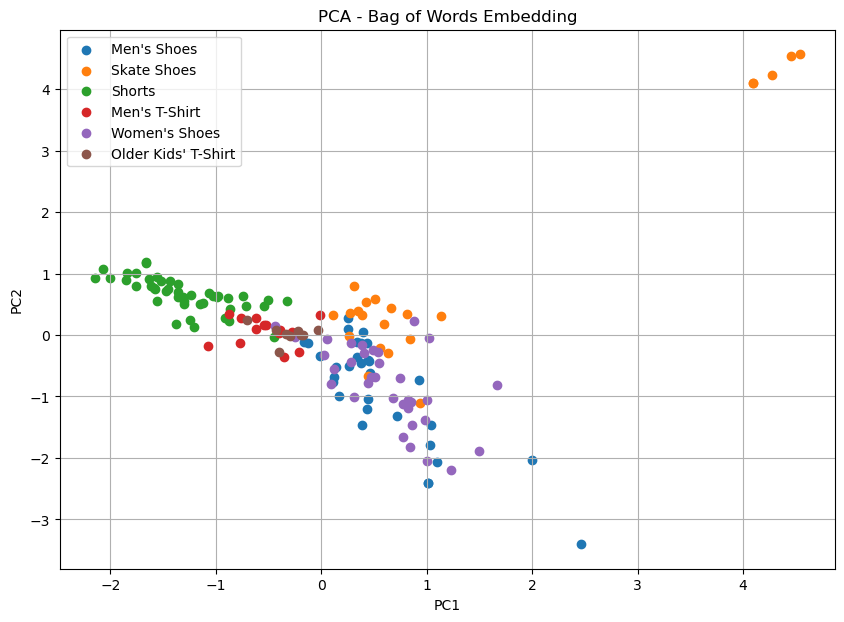

In [10]:
import matplotlib.pyplot as plt

df_filtered['pca_x'] = bow_pca[:, 0]
df_filtered['pca_y'] = bow_pca[:, 1]

plt.figure(figsize=(10, 7))
for label in df_filtered['Subtitle'].unique():
    subset = df_filtered[df_filtered['Subtitle'] == label]
    plt.scatter(subset['pca_x'], subset['pca_y'], label=label)

plt.title("PCA - Bag of Words Embedding")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(df_filtered['clean_description'])

In [12]:
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

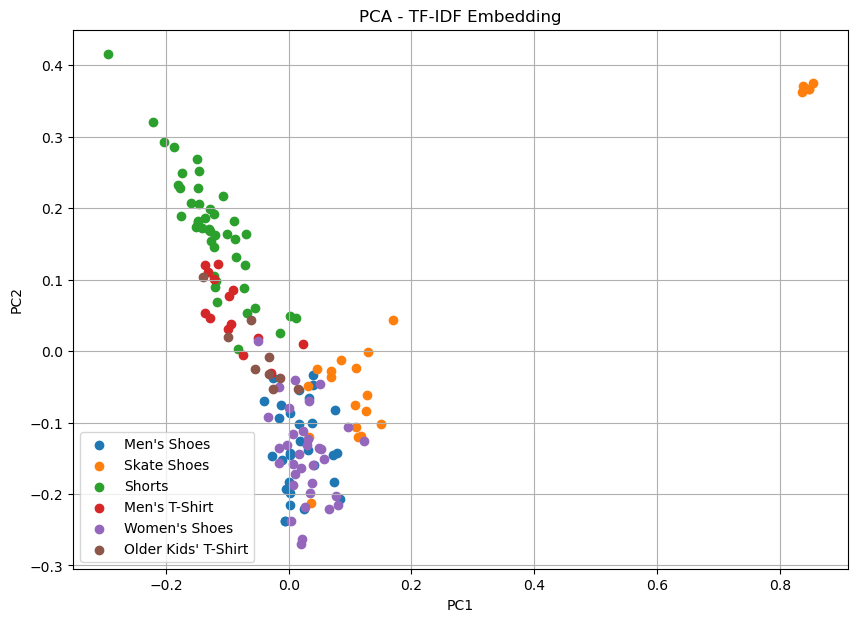

In [13]:
df_filtered['pca_x_tfidf'] = tfidf_pca[:, 0]
df_filtered['pca_y_tfidf'] = tfidf_pca[:, 1]

plt.figure(figsize=(10, 7))
for label in df_filtered['Subtitle'].unique():
    subset = df_filtered[df_filtered['Subtitle'] == label]
    plt.scatter(subset['pca_x_tfidf'], subset['pca_y_tfidf'], label=label)

plt.title("PCA - TF-IDF Embedding")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
tokenized_descriptions = df_filtered['clean_description'].apply(str.split).tolist()

In [15]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)


In [16]:
import numpy as np

def get_w2v_vector(tokens):
    vectors = [model_w2v.wv[word] for word in tokens if word in model_w2v.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

w2v_embeddings = np.array([get_w2v_vector(tokens) for tokens in tokenized_descriptions])

In [17]:
pca = PCA(n_components=2)
w2v_pca = pca.fit_transform(w2v_embeddings)

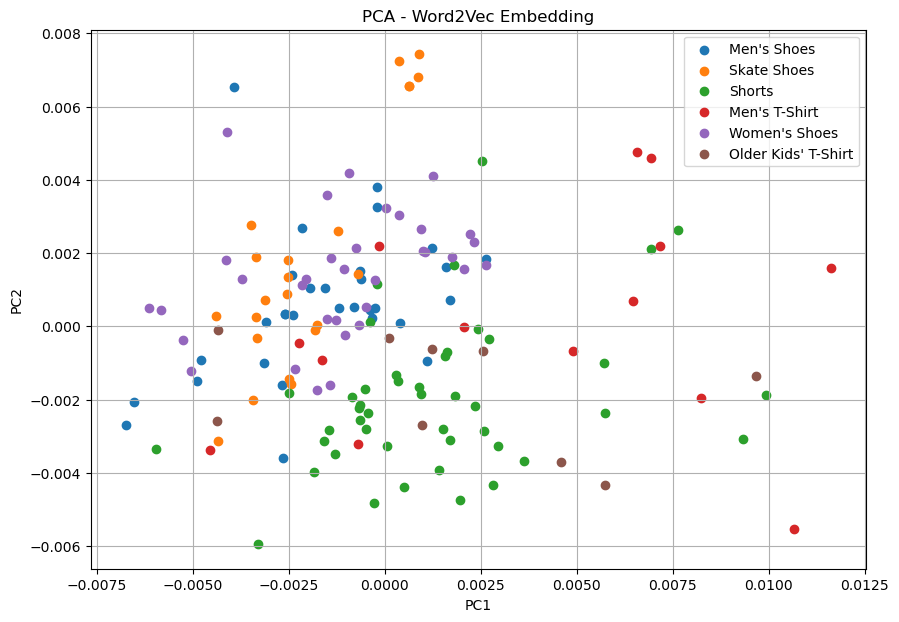

In [18]:
df_filtered['pca_x_w2v'] = w2v_pca[:, 0]
df_filtered['pca_y_w2v'] = w2v_pca[:, 1]

plt.figure(figsize=(10, 7))
for label in df_filtered['Subtitle'].unique():
    subset = df_filtered[df_filtered['Subtitle'] == label]
    plt.scatter(subset['pca_x_w2v'], subset['pca_y_w2v'], label=label)

plt.title("PCA - Word2Vec Embedding")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
### Comparison of the Embedding Methods

I tested three different ways to turn the product descriptions into numbers: Bag of Words, TF-IDF, and Word2Vec.

- **Bag of Words** just counts how many times each word appears. It worked, but the graph looked messy and the categories were not very clear.

- **TF-IDF** gives less importance to common words and more to rare ones. The graph was a bit better than Bag of Words, but it still didn’t group the products very clearly.

- **Word2Vec** was the best. It understands better the meaning of words by looking at their context. On the graph, the product types were more separated and made more sense.

➡️ I think **Word2Vec** is the most useful method here because it shows better results and makes the data more understandable.


SyntaxError: invalid character '’' (U+2019) (2951067004.py, line 7)